### Objetivo do algoritmo: realizar o preprocessamento da base de dados.

#### Importação das bibliotecas

In [1]:
import pandas as pd, \
       numpy as np, \
       seaborn as sns, \
       matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

#### Exploração da base de dados

In [2]:
df = pd.read_csv(r'../_Material/Bases de dados/credit_data.csv')
df  # default 0 indica empréstimo pago, default 1 indica o oposto

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


In [3]:
df.describe()

,clientid,income,age,loan,default
count,2000.000000,2000.000000,1997.000000,2000.000000,2000.000000
mean,1000.500000,45331.600018,40.807559,4444.369695,0.141500
std,577.494589,14326.327119,13.624469,3045.410024,0.348624
min,1.000000,20014.489470,-52.423280,1.377630,0.000000
25%,500.750000,32796.459717,28.990415,1939.708847,0.000000
50%,1000.500000,45789.117313,41.317159,3974.719419,0.000000
75%,1500.250000,57791.281668,52.587040,6432.410625,0.000000
max,2000.000000,69995.685578,63.971796,13766.051239,1.000000


### Visualização dos dados

A análise exploratória dos dados é importante porque é através dela que podemos verificar as condições da base de dados, entendendo o que cada atributo representa e identificando possíveis falhas, ajustando-as para realizar o aprendizado de máquina.

In [4]:
np.unique( df['default'], return_counts=True )

(array([0, 1], dtype=int64), array([1717,  283], dtype=int64))

##### A maior parte dos clientes pagaram empréstimos

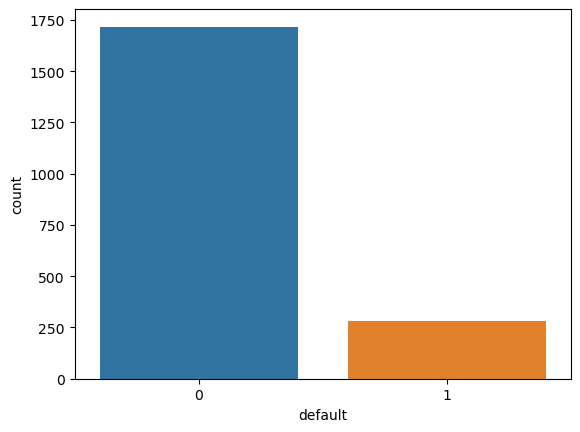

In [5]:
sns.countplot(x = df['default'] );  # " ; " retira cabeçalho indesejado

##### O gráfico abaixo mostra que a maior parte dos clientes da base de dados estão acima dos 40 anos de idade

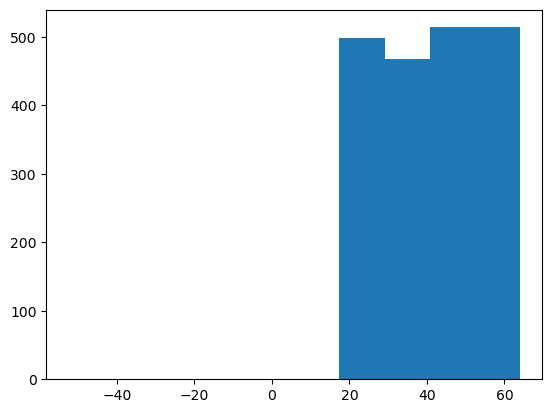

In [6]:
plt.hist( x = df['age'] );


##### A maior parte dos clientes nessa base de dados possui renda anual acima de 40.000

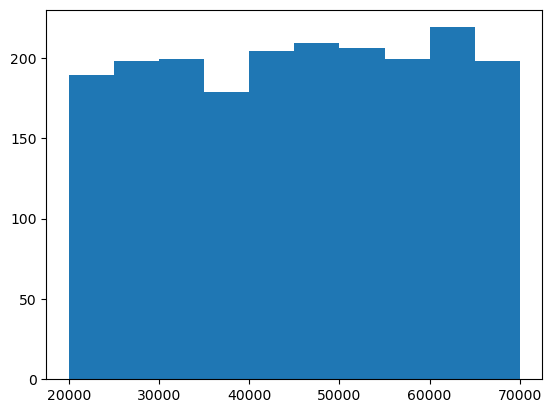

In [7]:
plt.hist( x = df['income'] );

##### A maioria dos clientes nessa base de dados possui dívidas com valores entre 0 e 6.000

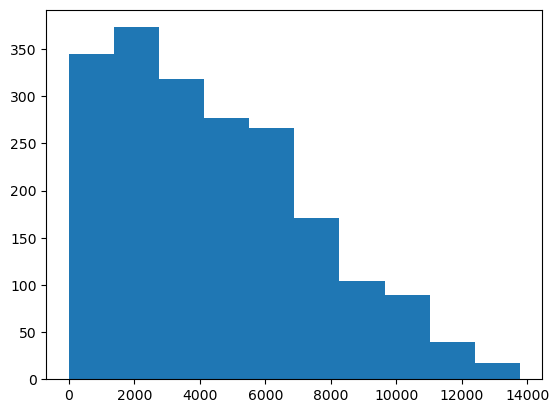

In [8]:
plt.hist( x = df['loan'] );

C:\Users\guilh\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


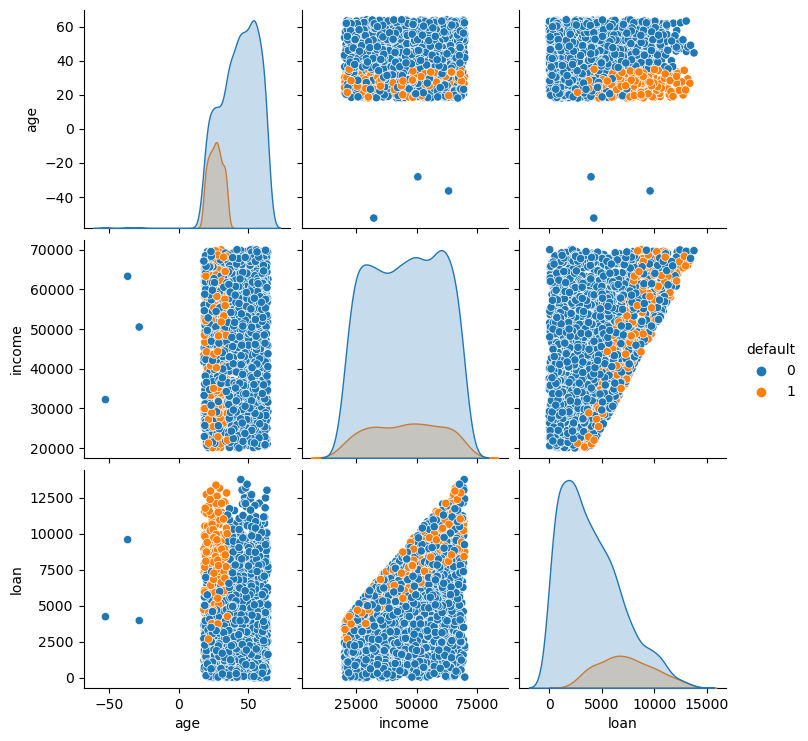

In [9]:
sns.pairplot( df, vars=('age', 'income', 'loan'), hue='default' );

#### Ajustando dados inconsistentes na coluna "age"

In [10]:
# Verificando idades negativas
df.loc[ df['age'] <= 0 ]

,clientid,income,age,loan,default
15,16,50501.726689,-28.218361,3977.287432,0
21,22,32197.620701,-52.423280,4244.057136,0
26,27,63287.038908,-36.496976,9595.286289,0


In [11]:
# Convertendo núme.ros negativos para positivos
df.loc[ df['age'] <= 0, 'age'] = df['age'].mean()

In [12]:
# Verificando valores nulos no conjunto de dados
df.isnull().sum()

clientid    0
income      0
age         3
loan        0
default     0
dtype: int64

In [13]:
df.loc[ df['age'].isnull() ]

,clientid,income,age,loan,default
28,29,59417.805406,NaN,2082.625938,0
30,31,48528.852796,NaN,6155.784670,0
31,32,23526.302555,NaN,2862.010139,0


In [14]:
# Substituindo valores vazios pela médiada idade do conjunto de dados
df['age'].fillna(df['age'].mean(), inplace=True)

# Verificando valores nulos novamente
df.loc[ df['age'].isnull() ]

,clientid,income,age,loan,default


#### Divisão entre previsores e classe

Os dados para treinamento/análise são conhecidos como previsores. Neste conjunto de dados, os previsores são "income", "age" e "loan".

A classe é o valor tido como resposta com base nos previsores. Neste caso, o atributo "default", que diz se o empréstimo foi pago ou não, contém as classes.

O algorítmo deverá identificar se o cidadão vai pagar ou não o empréstimo com base nos previsores do conjunto de dados.

In [15]:
# Separando os previsores do conjunto e transformando-os em matriz numpy
x_previsores = df.iloc[ : , 1:4 ].values

x_previsores

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [16]:
y_classes = df.iloc[ : , 4].values

y_classes

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

### Padronizando valores do conjunto de dados

Tendo em vista que o aprendizado de máquina acontece por meio de operações matemáticas entre matrizes,  valores maiores têm mais impacto nos resultados das equações aplicadas ao conjunto de dados. Logo, o algoritmo pode aprender incorretamente que um valor é mais importante do que outro. Para solucionar este problema, é preciso deixar os números na mesma escala.

Exemplo: existe grande diferença de escala entre os valores 25 e 25.000 (24.975 de diferença). A partir do momento em que a equação de padronização for usada, esses valores ficarão na mesma escala (aproximadamente entre 1 e -1), tornando-os adequados para o aprendizado de máquina.

In [17]:
# Verificando valores antes da padronização
x_previsores[:, 0].min(), x_previsores[:, 1].min(), x_previsores[:, 2].min()

(20014.4894700497, 18.055188510566897, 1.37762959325451)

In [18]:
scaler_previsores = StandardScaler()  # Istanciando objeto

# usando método fit_transform para padronização dos valores
x_previsores = scaler_previsores.fit_transform( x_previsores )

In [19]:
# Verificando valores após a padronização
x_previsores[:, 0].min(), x_previsores[:, 1].min(), x_previsores[:, 2].min()

(-1.7676158019964077, -1.726401685371924, -1.4592791099462408)

#### Dividindo base de treinamento e teste

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_previsores_treinamento, x_previsores_teste, y_classes_treinamento, y_classes_teste = train_test_split(
                    x_previsores,  # Previsores são valores para análise
                    y_classes,  # Classes são as respostas
                    test_size = 0.25,  # Definição do tamanho da base de teste (0.25 significa que a base teste terá 25% do tamanho da base original)
                    random_state = 0  # Definindo que a divisão dos dados não deve mudar a cada execução
                  )

In [22]:
x_previsores_treinamento.shape, y_classes_treinamento.shape

((1500, 3), (1500,))

In [23]:
 x_previsores_teste.shape, y_classes_teste.shape

((500, 3), (500,))

### Salvando a base de dados

In [24]:
import pickle  # Biblioteca para guardar multiplas variáveis em um arquivo

In [25]:
# Salvando bases de dados no arquivo "base_credit_data.pkl"
with open(r'../_Material/Bases de dados/Bases pre-processadas/base_credit_data.pkl', mode='wb') as arquivo:
    pickle.dump([
        x_previsores_treinamento,
        y_classes_treinamento, 
        x_previsores_teste,
        y_classes_teste
    ],
    arquivo
    )
    